Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [207]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 02:17:44--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 02:17:45--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv.7’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 02:17:45 (49.4 MB/s) -

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [209]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [210]:
data.shape

(200, 5)

In [211]:
pd.value_counts(data['Gender'])

<ipython-input-211-2cf755066c63>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
Gender,
Female,112
Male,88




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [212]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [213]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


El conjunto de datos está compuesto por cuatro variables principales: la variable "CustomerID", la cual representa un número identificador único para cada cliente, lo cual es útil para distinguir entre registros. La otra variable es "Age" que indica la edad del cliente en años, proporcionando así una idea del rango en el que se encuentran las personas, el cual va desde los 18 hasta los 70 años. Tambien esta la variable "Annual Income (k$)" que refleja el ingreso anual del cliente, lo que permite conocer el poder adquisitivo de cada individuo; en el conjunto, los ingresos varían entre 15k y 137k. Por último, la variable "Spending Score (1-100)", el cual representa un puntaje asignado al cliente que mide su comportamiento de gasto en una escala del 1 al 100, siendo 100 un cliente de alto gasto. Esta variable es clave para entender qué tan activamente consume cada cliente.


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [214]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [215]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [216]:
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [217]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

 Ees importante normalizar los datos antes de aplicar el algoritmo K-means, ya que K-means es sensible a las diferencias en las escalas de las variables, según lo mencionado en la guia que se dio en la clase. Ademas,  si las variables tienen escalas diferentes, unas pueden influir más que otras, por lo que normalizar pone todos los datos en una escala similar para que el modelo sea más preciso y equilibrado a la hora de analizar.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


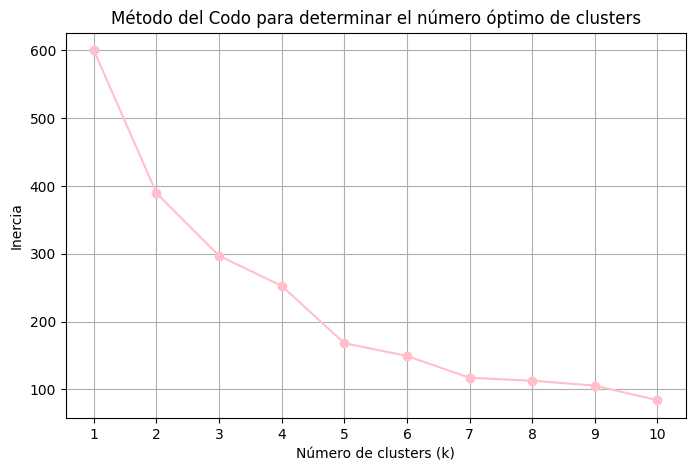

In [218]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', color='pink')
plt.xticks(range(1, 11))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

Al observar la gráfica del método del codo, se puede ver que el "codo" se forma aproximadamente en k = 5, lo que indica que a partir de ese punto, la disminución se vuelve más gradual o lineal.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [219]:
optimal_clusters = 5  #Ajuste según lo determinado en el método del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,3
3,4,1,23,16,77,4
4,5,1,31,17,40,4


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [220]:
pd.value_counts(data['Cluster'])

<ipython-input-220-bf9faf19068f>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
Cluster,
4,54
0,47
2,40
1,39
3,20


Al observar la tabla que arroja los resultados del modelo K-means con 5 clusters, se puede notar que la distribución de los clientes no es completamente uniforme, pues el Luste "4" cuenta con la mayor cantidad de clientes (54 personas), le sigue el Cluster "0" con "47 clientes", el Cluster 2 con "40", y el Cluster 1 con "39". Y por ultimo, esta el Cluster 3, es cual es el más pequeño, pues solo tiene "20" clientes.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [221]:
cluster_summary = data.groupby('Cluster')[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_summary = cluster_summary.rename(columns={
    'Age': 'Edad promedio',
    'Annual Income (k$)': 'Ingreso anual promedio',
    'Spending Score (1-100)': 'Puntaje de gasto promedio'
})
cluster_summary

,Edad promedio,Gender,Ingreso anual promedio,Puntaje de gasto promedio
Cluster,,,,
0,55.64,0.57,54.38,48.85
1,39.87,0.49,86.10,19.36
2,32.88,0.55,86.10,81.53
3,46.25,0.60,26.75,18.35
4,25.19,0.59,41.09,62.24


In [222]:
cluster_summary = data.groupby('Cluster')[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary = cluster_summary.rename(columns={
    'Age': 'Edad promedio',
    'Annual Income (k$)': 'Ingreso anual promedio',
    'Spending Score (1-100)': 'Puntaje de gasto promedio'
})
cluster_summary

,Edad promedio,Gender,Ingreso anual promedio,Puntaje de gasto promedio
Cluster,,,,
0,55.638298,0.574468,54.382979,48.851064
1,39.871795,0.487179,86.102564,19.358974
2,32.875000,0.550000,86.100000,81.525000
3,46.250000,0.600000,26.750000,18.350000
4,25.185185,0.592593,41.092593,62.240741


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Al analizar los clusters en términos de "edad", "ingreso y puntaje de gasto", se observan diferencias evidentes entre los grupos o clusters. Por ejemplo, en el "Cluster 0" se puede evidenciar que está compuesto por clientes de mayor edad (un promedio de 55 años), con ingresos (54.382979) y gastos (48.851064)moderados, lo que podría representar que los adultos mayores tienen un consumo equilibrado. Mientras que el "Cluster 1" incluye clientes de edad media, es decir, entre los 39-40 años, con ingresos altos (86.102564), pero un puntaje de gasto bajo (19.358974), lo que sugiere que es un grupo o segmento conservador a la hora de realizar sus compras. En contraste a lo anterior, el "Cluster 2" también tiene ingresos altos (86.100000) y su gasto promedio es alto (81.525000), y son más jóvenes, pues el promedio de edad es de 32 años, lo que puede indicar que son clientes jóvenes con alto poder adquisitivo y un comportamiento de compra activo. El "Cluster 3" presenta ingresos (26.750000) y gasto (18.350000) bajos, asi como una edad relativamente alta, pues su promedio de edad es de 46 años, ademas podria decirse que posiblemente son clientes con poder adquisitivo limitado o bajo. Finalmente, el "Cluster 4" agrupa a los clientes más jóvenes (25 años en promedio), con ingresos medios (41.092593) y un gasto relativamente alto (62.240741), lo que podría representar que los jóvenes son unos compradores activos o unos consumidores altos, pero con ingresos moderados o bajos a comparacion de sus gastos.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

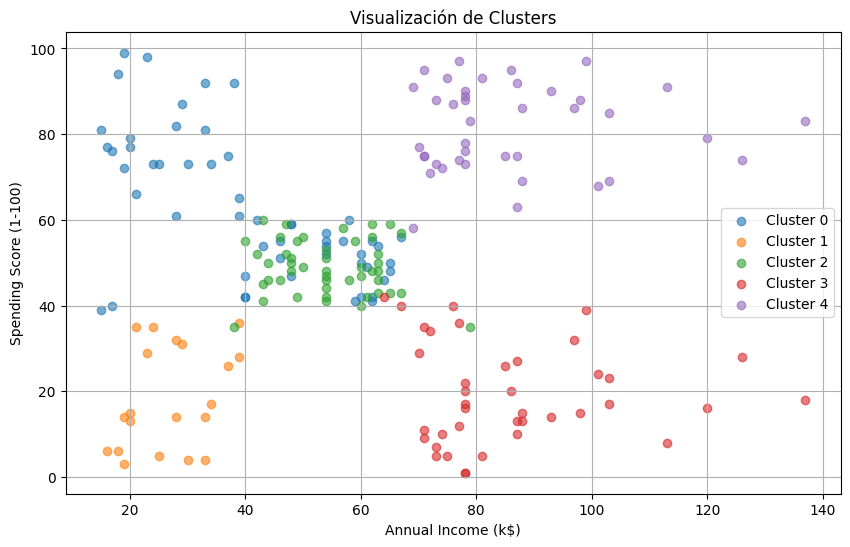

In [223]:
plt.figure(figsize=(10,6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(x=cluster_data['Annual Income (k$)'], y=cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualización de Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend (handles=plt.gca().get_legend_handles_labels()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.grid(True)
plt.show()

In [224]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans

def kmeans_plotter(data, k=5):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Add cluster labels to the dataframe
    data['label'] = kmeans.labels_

    # Create a 3D scatter plot with the clustered data
    fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='label',
                         symbol='label', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'},
                         opacity=0.7, width=900, height=850,
                         title=f'K-Means Clustering with k={k}',
                         labels={'label': 'Cluster'},
                         color_discrete_map={})  # Remove color legend

    fig.update_layout(showlegend=False)  # Remove color legend
    return fig

# Assuming 'train_data' is your DataFrame containing the data

# Call the function to create the K-Means clustering plot
fig = kmeans_plotter(data)
fig.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

En la gráfica se pueden identificar los cinco clusters que se encuentran bien diferenciados, lo cual evidencia que el algoritmo K-means agrupó a los clientes en segmentos con características similares. ahora, visualmente, cada grupo ocupa una región específica del espacio formado por el "ingreso anual" y el "puntaje de gasto". Por ejemplo, se podria decir que "Cluster 1" agrupa a personas con ingresos bajos y bajo puntaje de gasto, mientras que "Cluster 4" contiene a los clientes que tienen ingresos altos y también un puntaje de gasto elevado, lo que representa a los mejores clientes para el negocio, a los que se les puede brindar una personalizacion de producto o campaña. También esta el "Cluster 2" que tiene ingresos altos pero un bajo gasto, lo que indica que son clientes con alto potencial, pero poco comprometidos o con poco interes a lo que se les vende. Por otro lado, esta el "Cluster 0", el cual muestra ingresos medios y un gasto medio, reflejando así que son consumidores más estables o promedio y finalmente, el cluster que tiene los jóvenes de bajo ingreso, pero con un alto gasto, este es el "Cluster 3", lo que podría representar un perfil impulsivo o con hábitos de consumo específicos y fácil de llenar sus necesidades.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

La forma en la que agruparia a los cluster es la siguiente; para el "Cluster 0" lo llamaria "Clientes con gasto moderado", pues tienen una edad promedio de 55 años, asi como un ingreso anual promedio: 54.38 k$ y un puntaje de gasto de 48.85. a este grupo lo llame así, pues está compuesto por los clientes mayores que tienen un ingreso medio y un comportamiento de gasto equilibrado o moderado, es decir, son consumidores estables que podrían ser leales a los productos y finalmente al negocio.

Para el "Cluster 1" lo llamaria "comprador con alta capacidad económica pero poco gasto", pues tienen una edad promedio de 39 años, al igual su ingreso anual promedio es de 86.10 k$ y su puntaje de gasto: 19.36, lo llame asi porque son clientes que aunque tienen ingresos altos, gastan poco o muy poco, lo que representaria clientes exigentes o no comprometidos con la marca, dando asi una oportunidad de crear estrategiasy crecimiento para este grupo

Para el "Cluster 2" decidi llamarlo "Clientes top y activos", su edad promedio es de 32 años, su ingreso anual promedio es de 86.10 k$ y su puntaje de gasto es de 81.53. Lo que a mi parecer significa que son los mejores clientes, pues son jóvenes, con buen poder adquisitivo y un alto nivel de gasto.

Para "Cluster 3" lo llame "Comprador de bajo ingreso y gasto" que tienen una edad promedio de 46 años, ademas de un ingreso anual promedio de 26.75 k$ y un puntaje de gasto de 18.35; este grupo tiene bajos ingresos y también gastan poco, lo que puede evidenciar que es el grupo menos rentable.

Y para el "Cluster 4" lo llamaria "Jóvenes gastadores/fanfarrones", ellos tienen una edad promedio de 25 años, asi como un ingreso anual promedio de 41.09 k$ y un puntaje de gasto de 62.24, pues son jóvenes que tienen ingresos medios y un gasto alto, ya que los resultados muestran que pueden ser impulsivos a la hora de comprar, pero que su ingreso anual no es coherente con su gasto.